# PyTorch Workflow

1. Prepare and Load the Data
2. Building a Model
3. Fitting the Model to Data (Training)
4. Making Predictions and Evaluating the Model (Inference)
5. Saving and Loading a Model

In [186]:
import torch
from torch import nn # Import all the resources for Neural Network
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.0.1+cu118'

## Data (Preparing and Loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

In [187]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [188]:
len(X), len(y)

(50, 50)

## Spliting Data into training and test

In [189]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing our Data

In [190]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c= "b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

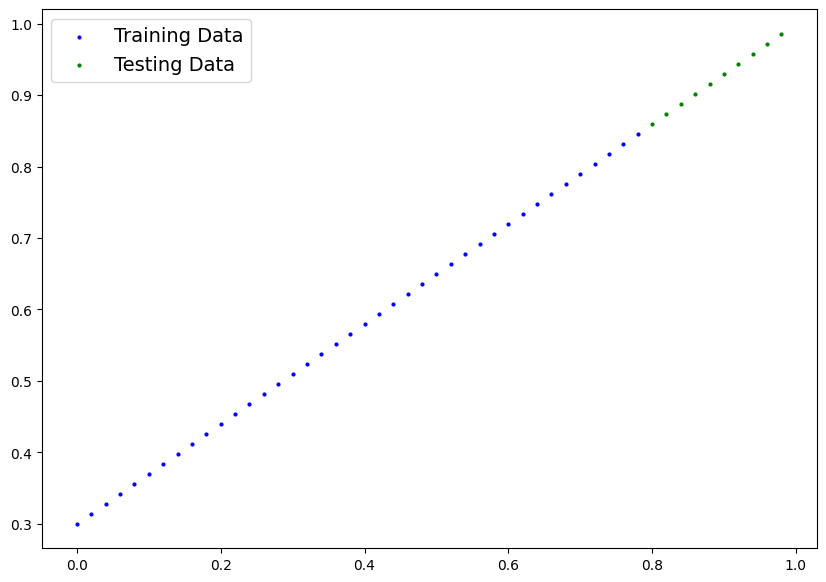

In [191]:
plot_predictions(X_train, y_train)

## Build a PyTorch Model

The weights and bias will be adjustement through backpropagation and gradient descent algorithms

In [192]:
# Create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherhits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,  # Use Gradient Descent
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True,
                                         dtype = torch.float))
  def forward (self, x: torch.Tensor) -> torch.Tensor: #"x" the input data
    return self.weights * x + self.bias

## PyTorch Model Building Essntials

[PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html#pytorch-cheat-sheet)

* **torch.nn** - Contains all of the buildings for computional graphs (Neural Netowrks can be considered a Computional grpahs)

* **torch.nn.Parameter** - What parameters should our model try and learn, often a PyTorch layer from torch.

* **torch.nn.Module** - The base class for NN modules, if you subclass it, you should overwrite forward()

* **torch.optim** - Optimizers in PyTorch, they will help with gradient descent

* **def forward()** - All nn.Module subclasses rwquire you to overwrite forward(), this method defines what happens in the forward computation

![image.png](attachment:image.png)

## Checking the contents of our PyTorch model

if we want to check out model parameters or whats inside our model, use .parameters()

In [193]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model

model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


## Making prediction using "torch.inference_mode()

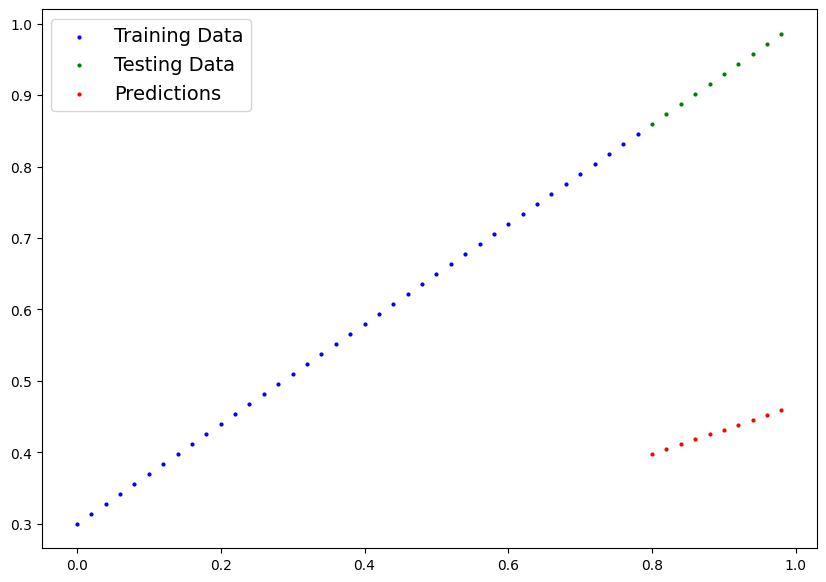

In [194]:
with torch.inference_mode():
  y_preds = model_0(X_test)
# you can do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
plot_predictions(predictions= y_preds)

## Training Process

### Choosing a Loss Function and Optimizer

* **Loss Function**: A function to measure how wrong your models predictions are to the ideal, lower is better

[Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

* **Optimizer**: Takes into account the loss of a model and adjusts the models parameters

[Optimizer](https://pytorch.org/docs/stable/optim.html)

### Training Loop

1. Loop through the data
2. Forward pass (Data in the Model)
3. Calculate the loss
4. Optimizer
5. Loss backward
6. Optimizer step

In [195]:
# Loss Function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.01) #learning rate)

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

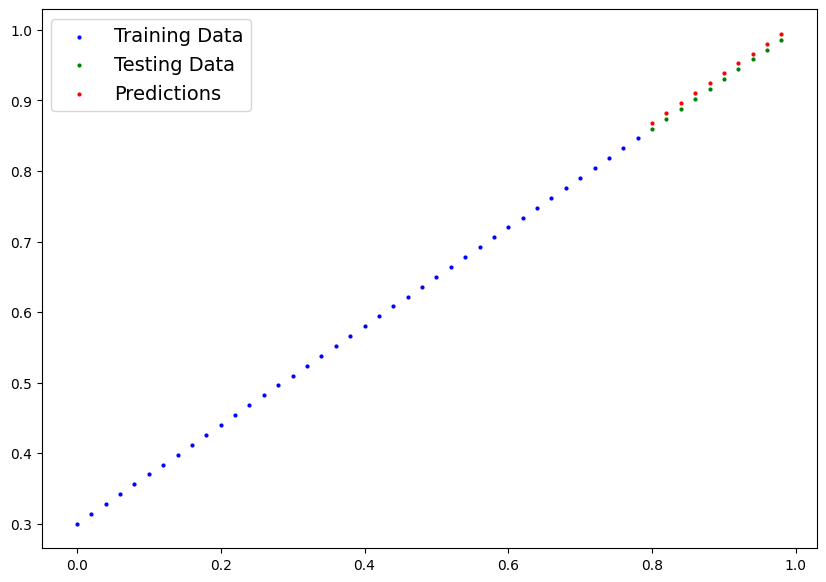

In [196]:
torch.manual_seed(42)
# Training Loop

epochs = 200

#Tracking Training
epoch_counts = []
loss_values = []
test_loss_values = []

# 1. Loop through the data

for epoch in range(epochs):
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to

# 2. Forward pass
  y_pred = model_0(X_train)

# 3. Calculate the loss
  loss = loss_fn(y_pred, y_train)

# 4. Optimizer zero grad
  optimizer.zero_grad()

# 5. Perform backpropagatio
  loss.backward()

# 6. Step the optimizer (Gradient Descent)
  optimizer.step()

  model_0.eval() # turns off the gradient tracking

  with torch.inference_mode(): #turns off gradient tracking & a couple things
    # you may also see torch.no_grad() in older PyTorch code
    # 1. Forward pass
    y_preds_mew = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(y_preds_mew, y_test)

  # Whats happening
  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
plot_predictions(predictions= y_preds_mew)

In [197]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

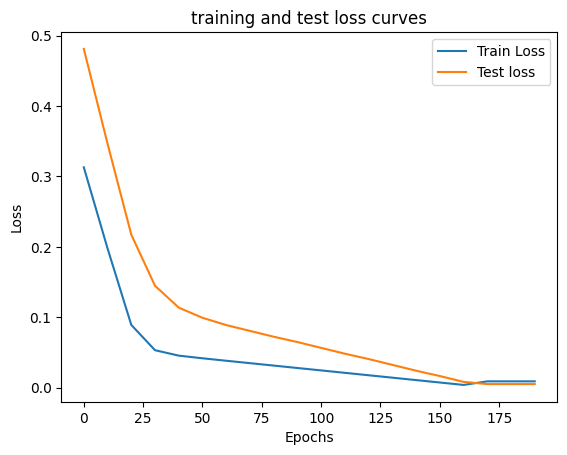

In [198]:
#Plot the loss cruve
plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_counts, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch

1. ```torch.save()``` - allows you to save a PyTorch object in PyTorch's pockle format
2. ```torch.load()```allows you to load a saved PyTorch object
3. ```torch.nn.Module.load_state_dict()``` - this allows to load a models's saved state dictionary

In [200]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# 2. Create model save path

MODEL_NAME = "01_pytprch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to: models/01_pytprch_workflow_model_0.pth


## Loading a saved Model

To load in a saved state_dict we have to instantiate a new instance of our model class

In [201]:
# Loading a PyTorch Model

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


## Making Predictions with put loaded model

In [202]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(X_test)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])